Things that affect outcome:

1. Random seed changes the result

1. Optimiser: don't use Adam. Adadelta is automatically attracted to the simplex

1. The clusters are not distinctive 

In [1]:
TF_SEED = 2


is in ipython: 1
is in ipython: 1
is in ipython: 1
[WARN] pymisca.vis_util cannot find network
[WARN] pymisca.vis_util cannot find network


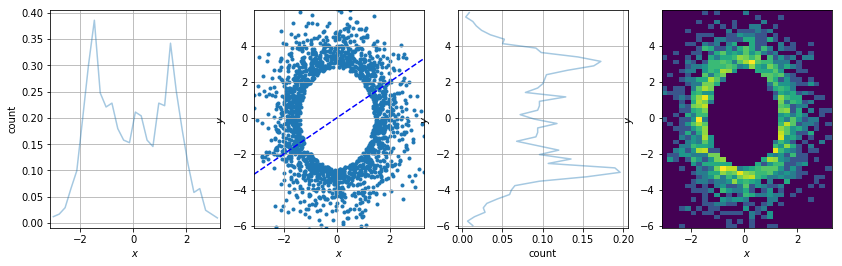

In [2]:
#### Adapted from: http://kyleclo.github.io/maximum-likelihood-in-tensorflow-pt-1/

import numpy as np
import pymisca.util as pyutil;reload(pyutil)
import pymisca.vis_util as pyvis;reload(pyvis)
%matplotlib inline 


D = 2


TRUE_MU = 0.0
TRUE_SIGMA = 2.0
SAMPLE_SIZE = (5000,D)

np.random.seed(0)
x_obs = np.random.normal(loc=TRUE_MU, scale=TRUE_SIGMA, size=SAMPLE_SIZE)
rsq = np.square(x_obs).sum(axis=-1)

keep = rsq > np.mean(rsq)
x_obs = x_obs[keep]

#### Random Linear transformation
# C = pyutil.random_covmat()
# x_obs = x_obs.dot(C)

#### Make an ellipse
x_obs.T[0] *= 0.5

# x_obs = np.square(x_obs)
pyvis.qc_2var(x_obs.T[0],x_obs.T[1])

In [3]:
%pdb  1

Automatic pdb calling has been turned ON


In [4]:
import tensorflow as tf
import pymisca.tensorflow_extra as pytf
reload(pytf)

tf.set_random_seed(TF_SEED)

from tensorflow.python.ops import nn
import gamma_radial_theta as mym;reload(mym)

_class = mym.GammaRadialTheta_VIMAP

m = _class(D=2,K = 12,name= 'test5')
m.init_model()

sess=  tf.Session()

with sess.as_default():
    mdl, (last_vars, hist_loss, opt) = m._fit_MAP(
        x_obs,
        MAX_ITER = 1500, 
    TOL_LOSS=1e-012
    )
    clu = m.predict(x_obs)


/home/shouldsee/.local/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


[WARN]unable to import edward.models
[WARN]unable to import edward.models
<class 'models.ModelA'> {'name': 'test'}
<models.ModelA object at 0x7fd4751d6650> {'name': 'test'}
[WARN]unable to import edward.models
<class 'gamma_radial_theta.GammaRadialTheta_VIMAP'> {'name': 'test5'}
('reuse', None)
('reuse', None)
('reuse', True)
('reuse', True)
Iter 0 17447.264
Iter 100 15377.645
Iter 200 13959.037
Iter 300 12798.208
Iter 400 11819.212
Iter 500 10988.793
Iter 600 10295.785
Iter 700 9741.149
Iter 800 9021.741
Iter 900 7959.9497
Iter 1000 7687.8467
Iter 1100 7596.127
Iter 1200 7538.3726
Iter 1300 7494.2275
Iter 1400 7441.6196


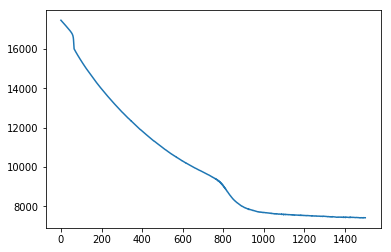

In [5]:
pyvis.plt.plot(hist_loss)

In [6]:
# tf.Session()
[ (x,x.eval(session= m.sess)) if not isinstance(x,float) else x for x in m.lp_param ]

[0.0, 0.0, (<tf.Tensor 'Sum:0' shape=() dtype=float32>, 19.568779), 0.0, 0.0]

In [7]:
# ed.as_random_variable(tfp.distributions.Normal)

In [8]:
# import abc
import tensorflow_probability as tfp
ed = tfp.edward2
# ?ed.Categorical?
# ed.
# ed.PoissonLogNormalQuadratureCompound?

# ed.as_random_variable()

In [9]:
w = m.post.weight.eval(session=sess)
# plt.hist
w

array([5.5334340e-08, 1.4489986e-08, 9.4848931e-02, 1.0973828e-07,
       1.3944239e-07, 2.8430053e-08, 3.7538207e-01, 3.1815943e-01,
       9.3041777e-08, 7.1954571e-02, 1.3965434e-01, 9.5310256e-08],
      dtype=float32)

In [10]:
# m.prior.concentration.__class__.__name__ == 'Uniform'

[WARN] pymisca.vis_util cannot find network


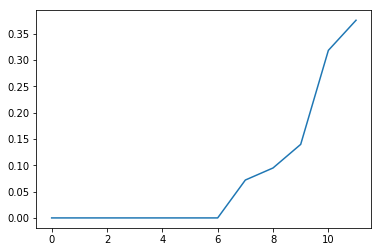

[WARN] Unable to sample posterior due to: Not implemented yet


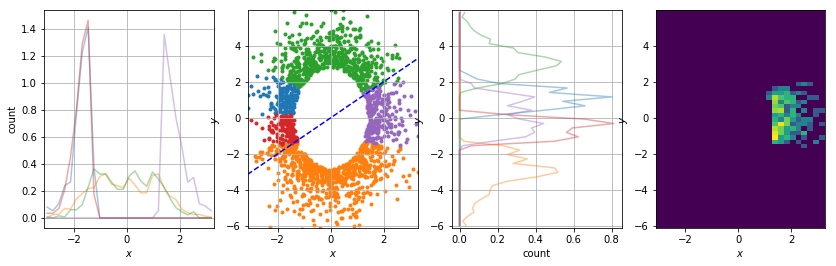

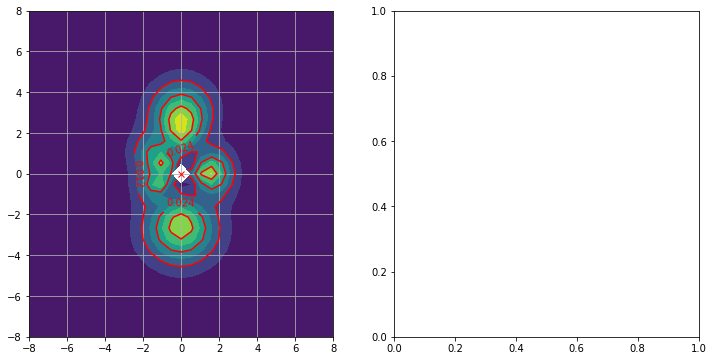

In [11]:
import pymisca.vis_util as pyvis;reload(pyvis)
w = m.post.weight.eval(session=sess)
pyvis.plt.plot(sorted(w))
pyvis.plt.show()
# sess = tf.InteractiveSession()
with sess.as_default():
# if 1:
    EMD = m.post.emission
#     EMD = makeEMD(last_vars)

    X = x_obs
    
    pyvis.qc_2var(X.T[0],X.T[1],clu=clu)

    try:
        Y = EMD.sample(1000).eval()
        pyvis.qc_2var(Y.T[0],Y.T[1],)    
    except Exception as e: 
        print ('[WARN] Unable to sample posterior due to: %s' % e)
        
#     Y = m.post.emission.value().eval(session = sess)
#     Y = m.post.emission.sample(1000).eval(session=sess)
#     Y = EMD.sample(len(X)).eval()


    f = EMD.prob
    f = pyutil.wrapTFmethod(f)
    f = pyutil.arrayFunc2mgridFunc(f)
    pyvis.dmet_2d(f,vectorised=1,span=[-8,8]);    


[[-0.36082593 -0.9326332 ]
 [ 0.9375946   0.34773034]
 [-0.8449271   0.5348815 ]
 [ 0.38913217  0.92118186]
 [ 0.91238064 -0.40934289]
 [ 0.44928002  0.893391  ]
 [-0.00569348 -0.9999838 ]
 [ 0.00458616  0.9999895 ]
 [-0.9839922  -0.17821166]
 [-0.94384843 -0.3303787 ]
 [ 0.99942935  0.03377702]
 [-0.926029    0.37745216]]
0.09484893
9.736256
[-0.8449271  0.5348815]
0.29061973
1.334382

('partition:', 0.9854364395141602)


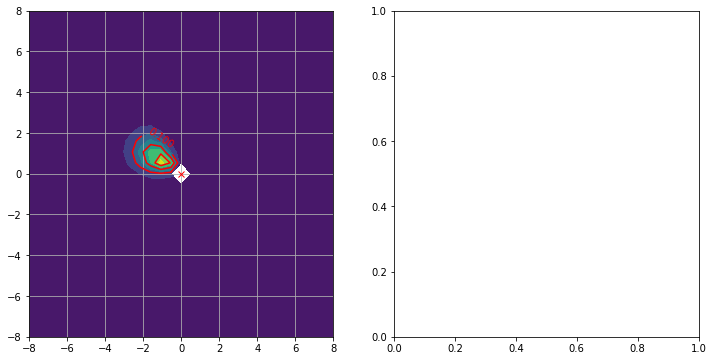

0.37538207
5.053719
[-0.00569348 -0.9999838 ]
0.19015497
2.2260349

('partition:', 0.9976816773414612)


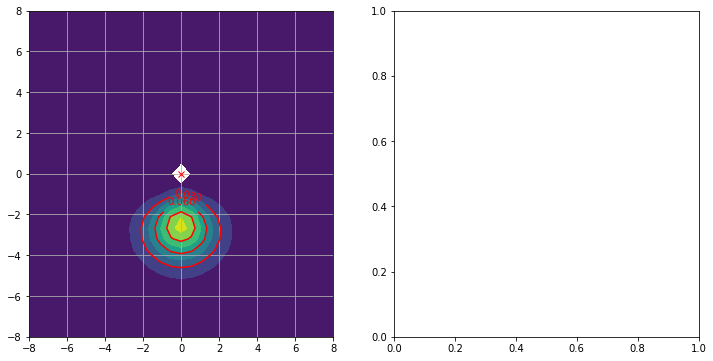

0.31815943
8.251163
[0.00458616 0.9999895 ]
0.18348946
2.0898337

('partition:', 1.0020604133605957)


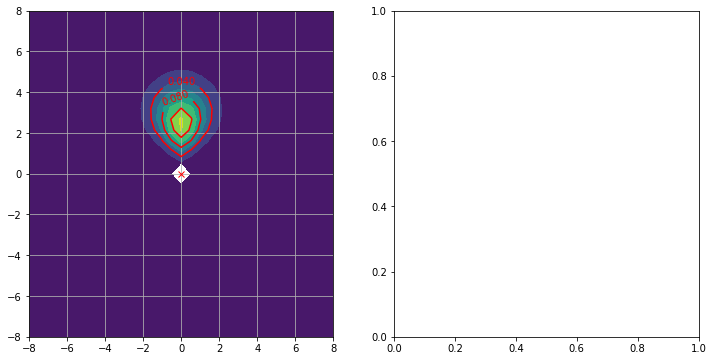

0.07195457
9.134633
[-0.94384843 -0.3303787 ]
0.4380029
1.4635328

('partition:', 0.9985780119895935)


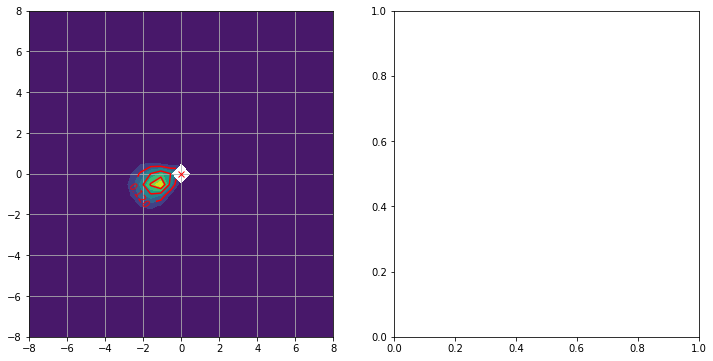

0.13965434
5.6951733
[0.99942935 0.03377702]
0.43573734
1.9092659

('partition:', 1.0060564279556274)


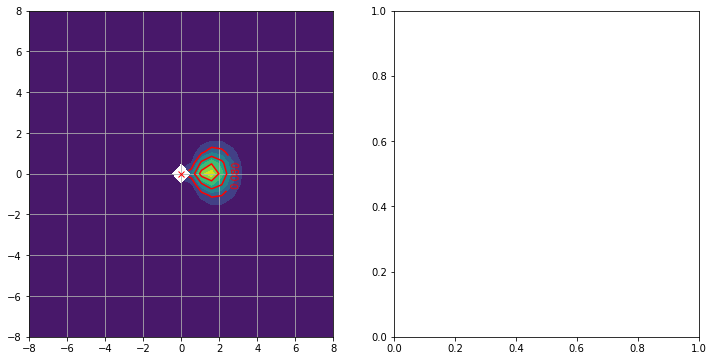

In [12]:
with sess.as_default():
    print m.post.vm_direction.eval()
    EMD = m.post.components[-2]
    w = m.post.weight.eval()
    for i,EMD in enumerate(m.post.components):
        if w[i]<0.01:
            continue
        print w[i]
        print EMD.distribution.subDists[1].concentration.eval()
        print EMD.distribution.subDists[1].mean_direction.eval()
        print EMD.distribution.subDists[0].rate.eval()
        print EMD.distribution.subDists[0].concentration.eval()
        print 
        f = EMD.prob
        f = pyutil.wrapTFmethod(f)
        f = pyutil.arrayFunc2mgridFunc(f)
        pyvis.dmet_2d(f,vectorised=1,span=[-8,8]);    
        part = pyutil.cubicRInt(f=f.arrayFunc, R=16.,D=D, N = 1000000)
        print ('partition:',part,)
        pyvis.plt.show()

In [13]:
import synotil.CountMatrix as scount;reload(scount)
import synotil.PanelPlot as spanel;reload(spanel)

[WARN] pymisca.vis_util cannot find network
is in ipython: 1
[WARN] pymisca.vis_util cannot find network
is in ipython: 1


<module 'synotil.PanelPlot' from 'synotil/PanelPlot.pyc'>

In [14]:
import pymisca.tensorflow_extra as pytf
# ?pytf.op_minimise

In [15]:
# ?pytf.op_minimisep